In [1]:
#Shree.(August,2018). House price prediction, Version 2. Retrieved February 2, 2021 from https://www.kaggle.com/shree1992/housedata
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#import the dataset
dataset = pd.read_csv('C:/Users/billy/data.csv')
y = dataset.iloc[:,1].values                           # get the 'price' column
X = dataset.iloc[:,2].values                           # get the '#ofbedrooms' column
dataset['city'].replace('Seattle', 0, inplace = True)  # for replacing 'Seattle' to 0
dataset[dataset['city'] != 0] = 1                      # for replacing others to 1
X_class = dataset.iloc[:,1:3].values                   # get the 'price' and '#ofbedrooms' columns
y_new = dataset.iloc[:,15].values                      # get the 'city' column

In [3]:
dataset.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,1,1.0,1.0,1.0,1,1,1.0,1,1,1,1,1,1,1,1,1,1,1
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,0,WA 98119,USA
2,1,1.0,1.0,1.0,1,1,1.0,1,1,1,1,1,1,1,1,1,1,1
3,1,1.0,1.0,1.0,1,1,1.0,1,1,1,1,1,1,1,1,1,1,1
4,1,1.0,1.0,1.0,1,1,1.0,1,1,1,1,1,1,1,1,1,1,1


In [4]:
# initial analysis of the data
dataset.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,1.982799e+05,1.741957,1.329022,625.967826,1822.132391,1.181522,0.658913,0.759783,1.862826,492.299130,134.326739,668.273043,339.955435,0.658043
std,3.858272e+05,1.185429,0.656793,992.123596,3489.953783,0.434421,0.474126,0.593793,1.274334,770.264165,316.684007,925.970120,748.962597,0.474417
min,0.000000e+00,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,3.785625e+05,3.000000,1.250000,1270.000000,3600.000000,1.000000,1.000000,1.000000,3.000000,1040.000000,1.000000,1926.000000,1.000000,1.000000
max,1.289900e+07,9.000000,6.250000,8670.000000,74487.000000,3.500000,1.000000,4.000000,5.000000,6120.000000,2550.000000,2014.000000,2014.000000,1.000000


In [5]:
# Spliting the dataset into train set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train = X_train.reshape(-1, 1)
y_train = y_train
X_test = X_test.reshape(-1, 1)

In [6]:
# Training the linear regression on the train set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
# Predict the test result
y_pred = regressor.predict(X_test)

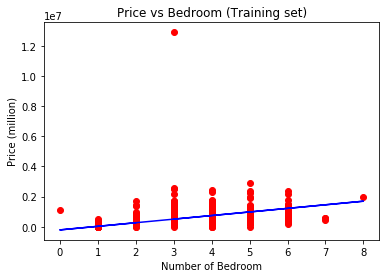

In [8]:
# Visualize the train set
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Price vs Bedroom (Training set)')
plt.xlabel('Number of Bedroom')
plt.ylabel('Price (million)')
plt.show()

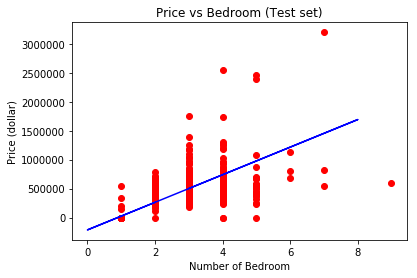

In [9]:
# Visualize the test set 
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Price vs Bedroom (Test set)')
plt.xlabel('Number of Bedroom')
plt.ylabel('Price (dollar)')
plt.show()

In [10]:
# Predict the price of 5 bedrooms house using linear regression
print(regressor.predict([[5]]))

[977325.90748586]


In [11]:
# Training the Polynomial Regression on the whole dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X.reshape(-1, 1))
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

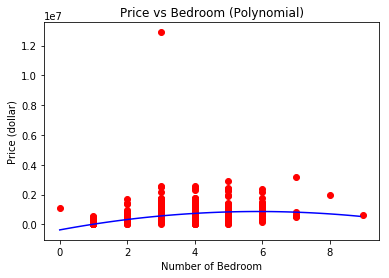

In [23]:
# Visualize the Polynimial Regression 
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Price vs Bedroom (Polynomial)')
plt.xlabel('Number of Bedroom')
plt.ylabel('Price (dollar)')
plt.show()

In [13]:
# Predict the price of 5 bedrooms house using Polynomial regression
lin_reg2.predict(poly_reg.fit_transform([[5]]))

array([833051.7213517])

In [14]:
# Spliting the dataset into train set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_class, y_new, test_size = 0.25, random_state = 0)

In [15]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
print(X_train)

[[-0.49604167 -0.62440782]
 [-0.49604167 -0.62440782]
 [-0.49604167 -0.62440782]
 ...
 [-0.49604167 -0.62440782]
 [-0.49604167 -0.62440782]
 [ 0.6823965   1.07852259]]


In [17]:
# Training the logistics regression model on training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

C:\Users\billy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [18]:
# Predict the training set result
print(classifier.predict(sc.transform([[1,3]])))

[0]


In [525]:
# Predict the test set result
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[1 1]
 [1 1]
 [1 1]
 ...
 [1 1]
 [0 0]
 [0 0]]


In [526]:
# Making confusion matrix checking how many prediction was correct and the accuracy which is 99%
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[398   6]
 [  0 746]]


0.9947826086956522